In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

# logging.basicConfig(level=logging.WARNING)
logging.basicConfig(level=logging.WARNING)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/', parallel=True)  # type: ignore
shnitsel_db_triplet: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets/', parallel=True
)  # type: ignore
shnitsel_db_full: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets_nacs_socs/', parallel=True
)  # type: ignore
shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)
shnitsel_db_triplet.set_compound_info(
    compound_info=CompoundInfo("I01"), apply_to_all=True
)
shnitsel_db_full.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)
shnitsel_db_full.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 1,
            traj.state_charges.attrs,
        )
    )


shnitsel_db = shnitsel_db.map_over_trajectories(set_charges)  # type: ignore
shnitsel_db_triplet = shnitsel_db_triplet.map_over_trajectories(set_charges)  # type: ignore
shnitsel_db_full = shnitsel_db_full.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db
# shnitsel_db_triplet

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

dict_keys(['energy', 'forces', 'dip_perm'])
Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:03<00:00,  3.04s/page]

Writing pdf with 3 pages


{'/unknown/aggregate of subtree(unknown)': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

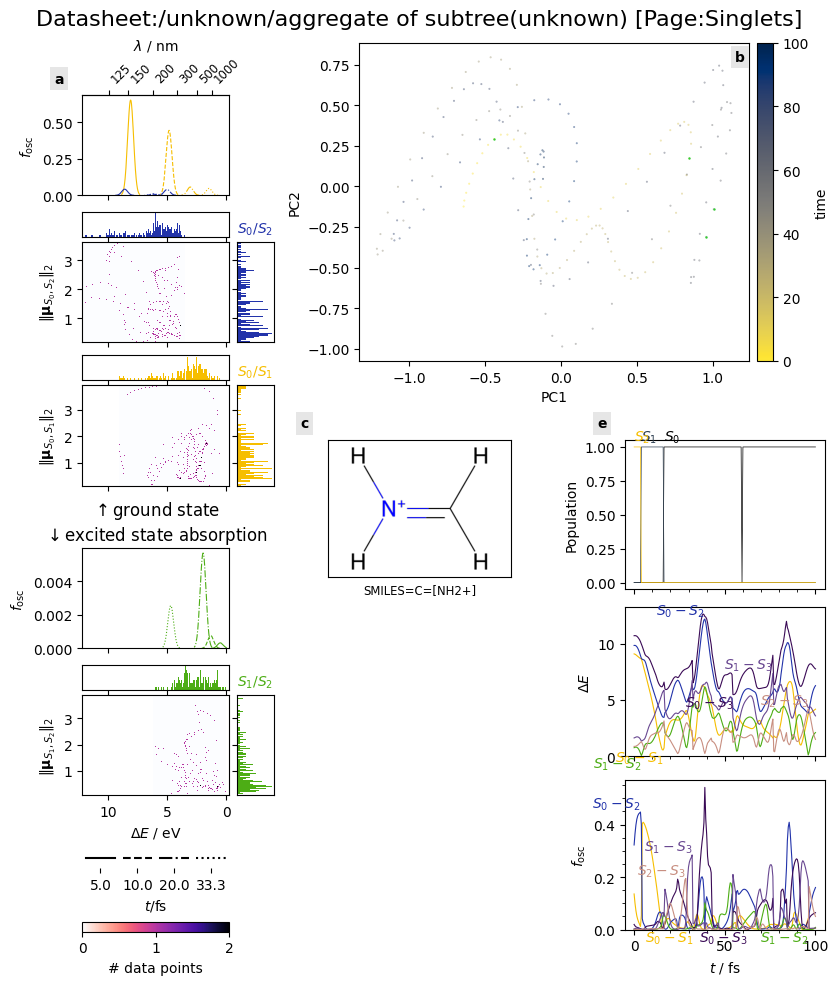

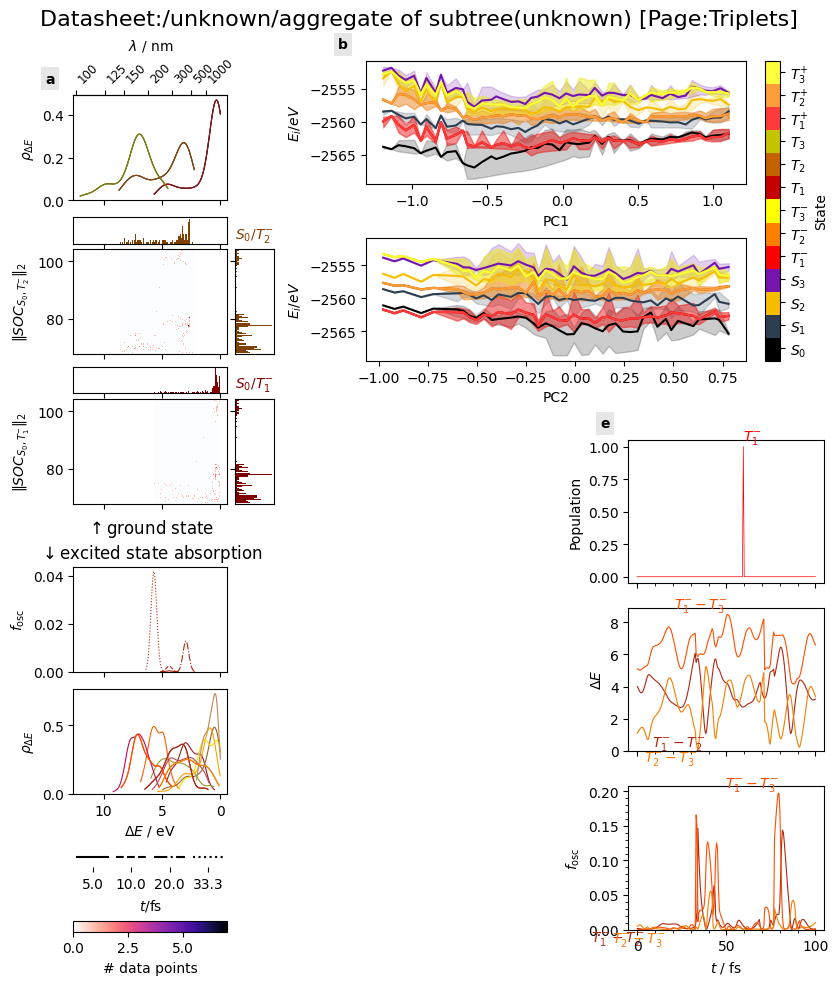

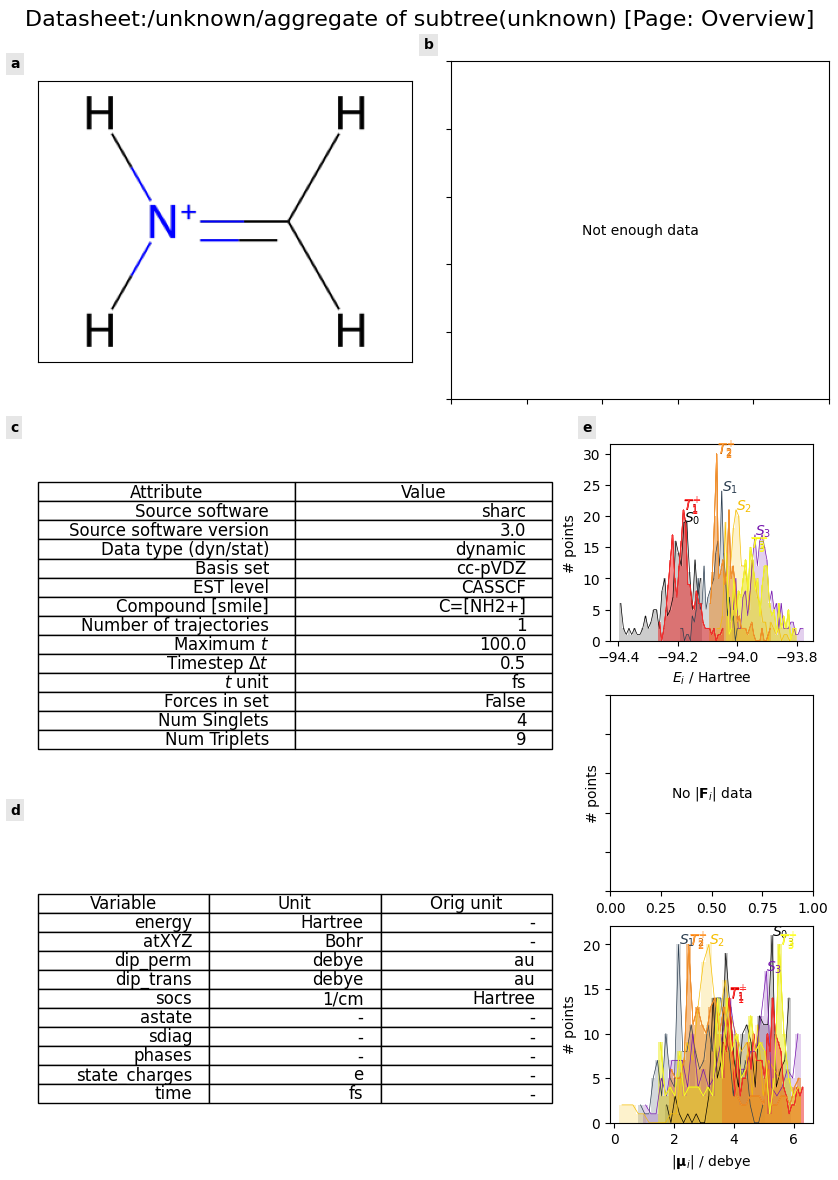

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_triplet)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_coupling_page=False, path="./triplet_sharc.pdf"
)
# sheet.datasheet_pages

c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc


Rendering coupling page for 13 states with at least 78 relevant state transitions.


100%|██████████| 78/78 [00:00<00:00, 616.44it/s]


[ 0.5581185   0.04144105  0.17939307  0.43256972 -0.08488251  0.44736729
  0.02278861 -0.02381506  0.28034345  0.14683089  0.28541764 -0.09527667
 -0.00300734 -0.05759002  0.25503066]
[-0.02451993  0.17935422  0.53766232 -0.21116164 -0.10017329 -0.07585472
  0.18497203  0.12170958  0.07757666  0.45238189 -0.37815373 -0.15751816
 -0.02294306  0.38472108  0.20427409]
dict_keys(['energy', 'forces', 'dip_perm'])
Saving datasheet as pdf. Please be patient, this may take some time.


Written:   0%|          | 0/1 [00:00<?, ?page/s]C:\Users\Reshief\Documents\git\shnitsel-tools\shnitsel\vis\datasheet\datasheet.py:231: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  pdf.savefig(fig, dpi=300)
Written: 100%|██████████| 1/1 [00:11<00:00, 11.08s/page]

Writing pdf with 5 pages


{'/unknown/aggregate of subtree(unknown)': [<Figure size 827x974.167 with 15 Axes>,
  <Figure size 827x974.167 with 15 Axes>,
  <Figure size 650x650 with 169 Axes>,
  <Figure size 827x1169 with 8 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)


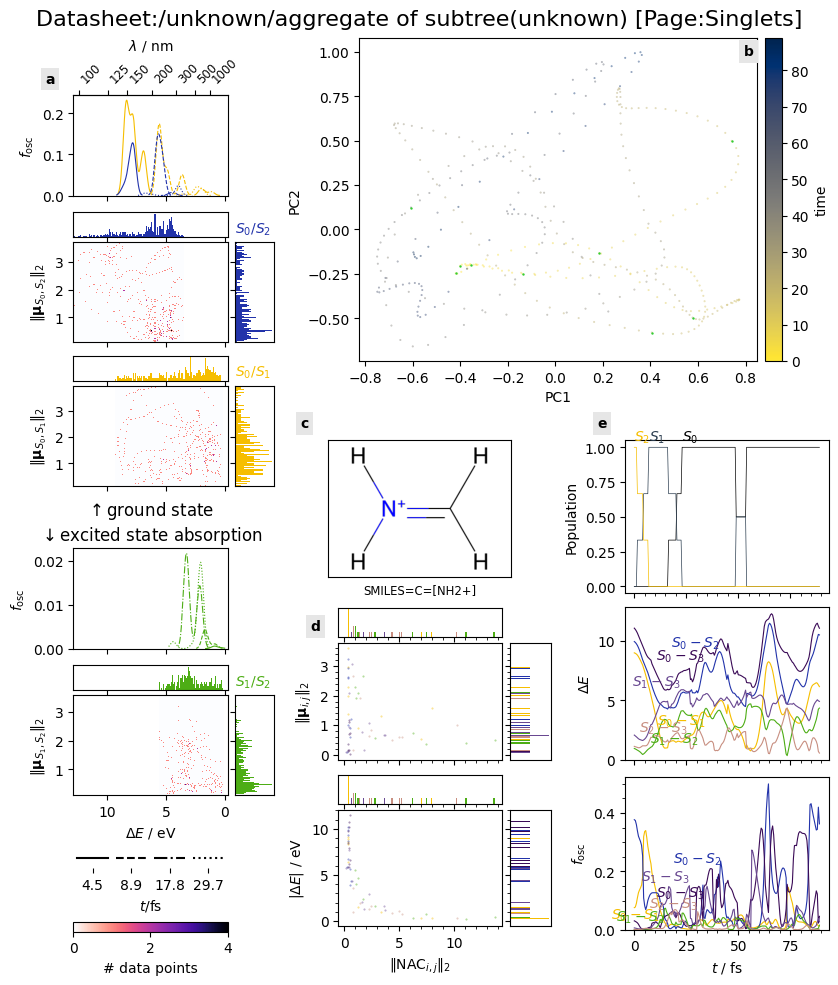

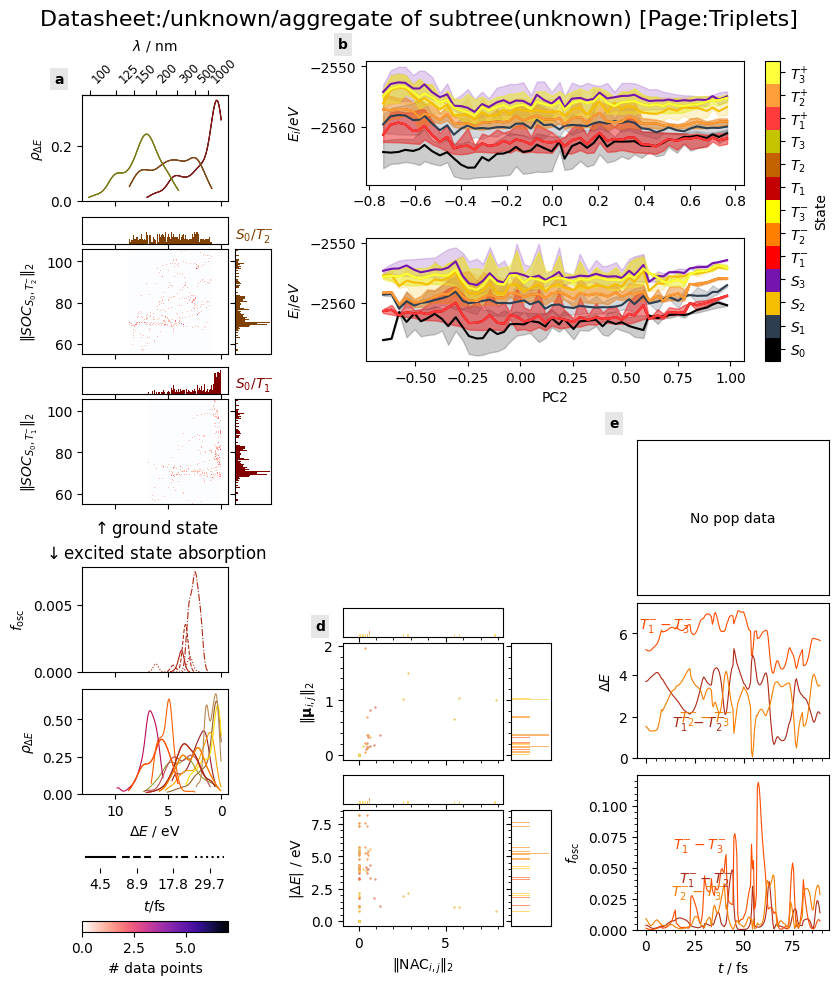

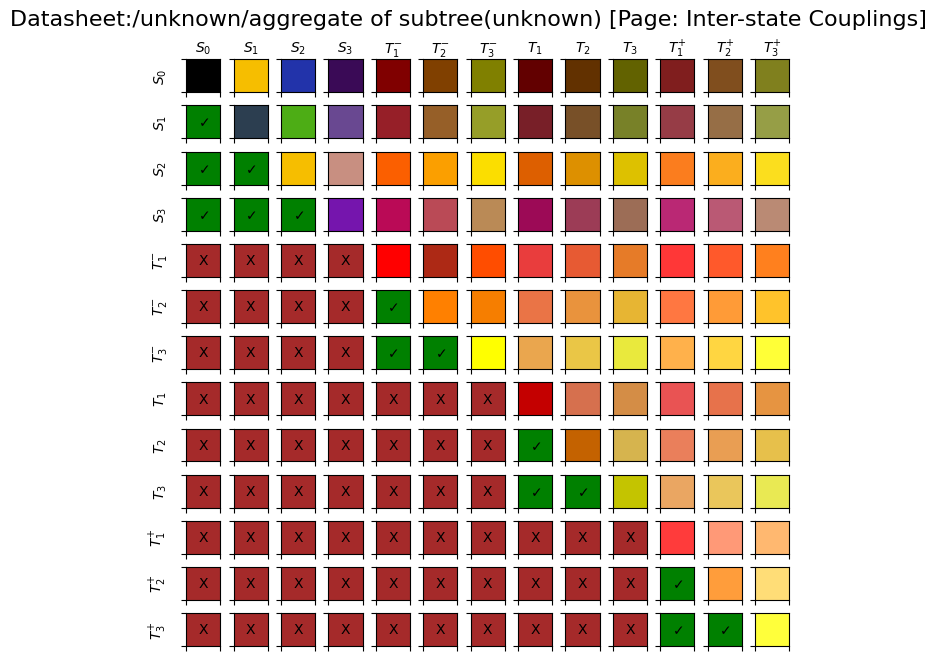

c:\Users\Reshief\Documents\git\shnitsel-tools\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


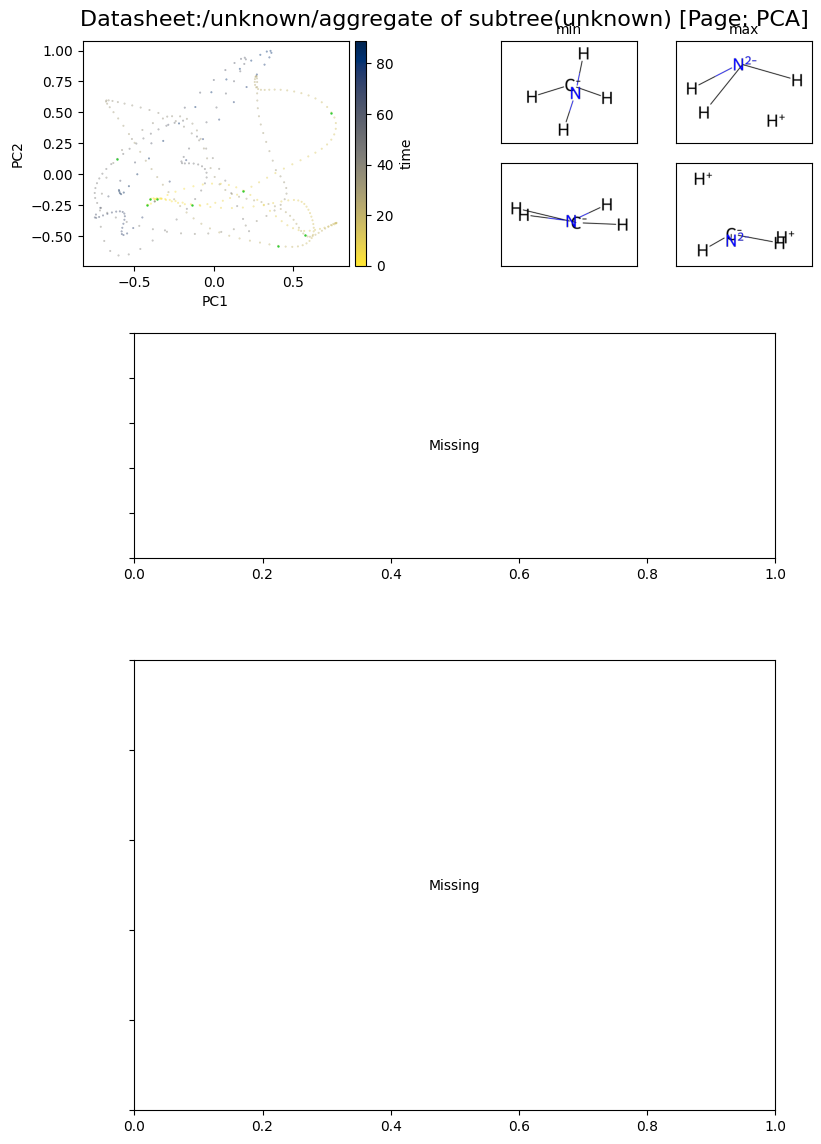

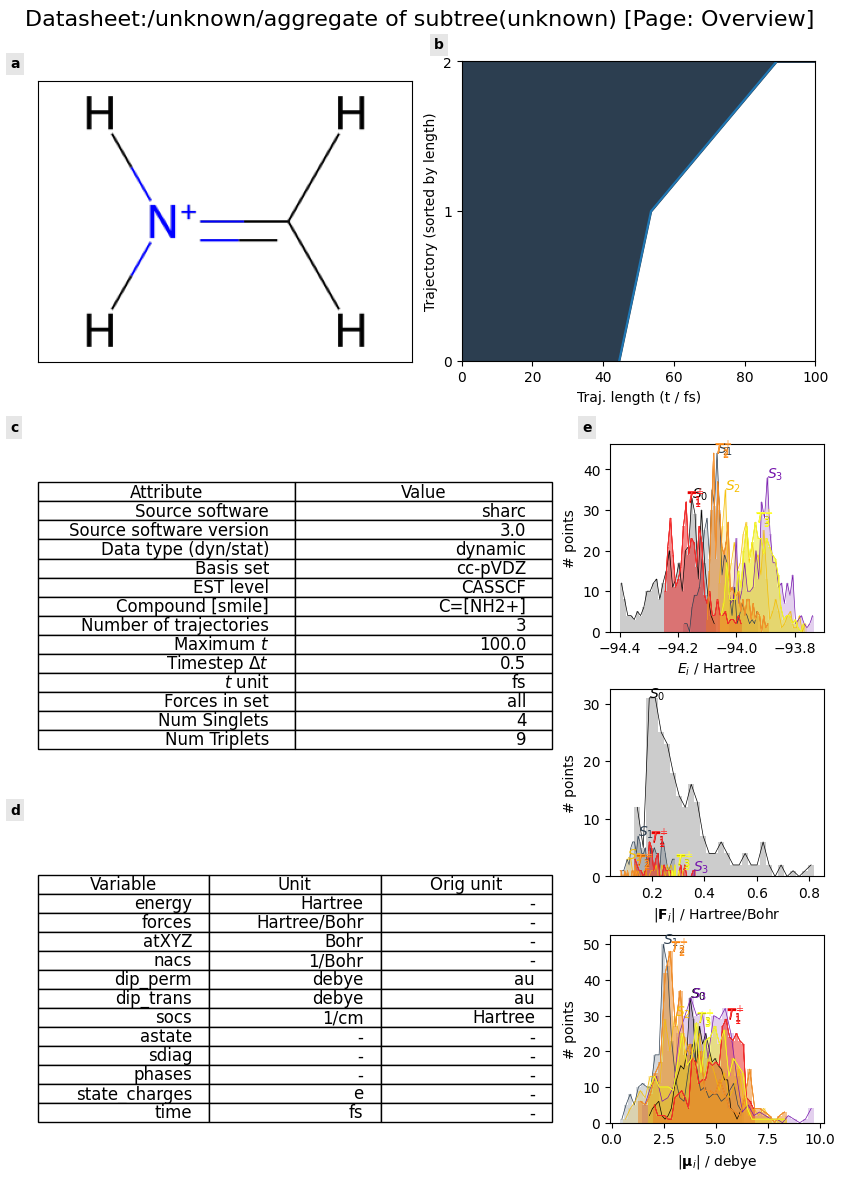

In [4]:
sheet = Datasheet(shnitsel_db_full)
# sheet.datasheet_pages['root'].charge = 1
sheet.plot(
    include_pca_page=True, include_meta_page=True, path="./triplet_sharc_full.pdf"
)
# sheet.plot( path="./triplet_sharc_full.pdf")
# sheet.datasheet_pages
# sheet.datasheet_pages[list(sheet.datasheet_pages.keys())[0]].per_state

In [5]:
%time sheet.calc_all()

CPU times: total: 0 ns
Wall time: 1.59 ms


[12:22:47] WARNING: Proton(s) added/removed



In [6]:
%time sheet.plot_per_state_histograms()

CPU times: total: 0 ns
Wall time: 0 ns


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')